# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [8]:
# Add model training in here!
model = RandomForestClassifier( n_estimators = 500) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier(n_estimators=500)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [10]:
# Generate predictions here!
predictions = model.predict(X_test)

### Confusion Matrix
A confusion matrix is an N x N matrix where N is the number of target classes. It represents the number of actual outputs and the predicted outputs. Some terminologies in the matrix are as follows:

- True Positives: It is also known as TP. It is the output in which the actual and the predicted values are YES.
- True Negatives:  It is also known as TN. It is the output in which the actual and the predicted values are NO.
- False Positives: It is also known as FP. It is the output in which the actual value is NO but the predicted value is YES.
- False Negatives:  It is also known as FN. It is the output in which the actual value is YES but the predicted value is NO.

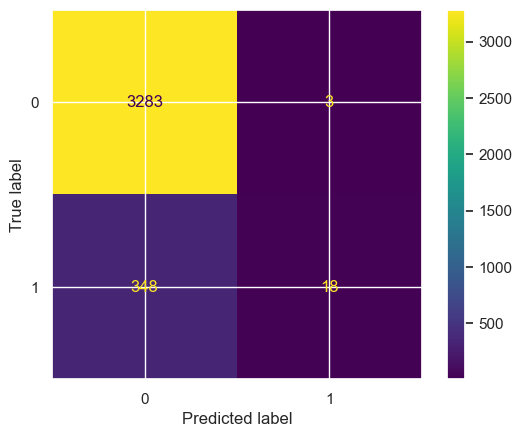

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions) 
  
cm_display = metrics.ConfusionMatrixDisplay( 
    confusion_matrix=confusion_matrix) 
  
cm_display.plot() 
plt.show() 

churn = 1 and not churn = 0
- In the test set about 10% of the rows are churners.
- we have 3282 out of 3286 as true negatives. This means that out of all the negative cases, we predicted 3282 as negative.
- Looking at the false negatives, this is where we have predicted a client to not churn when in fact they did churn. This number is quite high at 348, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- In the false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 4 cases, which is great!
- look at the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 18 of those 366, which is very poor.

### Accuracy 
It is defined as the ratio of the number of correct predictions to the total number of predictions. This is the most fundamental metric used to evaluate the model. The formula is given by

Accuracy = (TP+TN)/(TP+TN+FP+FN)

However, Accuracy has a drawback. It cannot perform well on an imbalanced dataset. Suppose a model classifies that the majority of the data belongs to the major class label. It yields higher accuracy. But in general, the model cannot classify on minor class labels and has poor performance.

### Precision
It is the ratio of true positives to the summation of true positives and false positives. It basically analyses the positive predictions.

Precision = TP/(TP+FP)

The drawback of Precision is that it does not consider the True  Negatives and False Negatives.

### Recall 
It is the ratio of true positives to the summation of true positives and false negatives. It basically analyses the number of correct positive samples.

In [11]:
# Calculate performance metrics here!
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

Accuracy: 0.9038882803943045
Precision: 0.8571428571428571
Recall: 0.04918032786885246


1. Accuracy: The model correctly predicted 90.39% of the cases overall. This seems like a high score, but it doesn't give the full picture, especially with class imbalance.
- Given that churn is only about 10% of the dataset, the model could achieve high accuracy by simply predicting most customers as not churners. In this case, it correctly predicts the majority class (non-churners) but might be failing on the minority class (churners).
- Accuracy in imbalanced datasets can be misleading because it doesn't account for how well the model identifies the minority class (in this case, churners). I need to look at precision and recall for a more meaningful evaluation.
2. Precision: Out of all the customers that the model predicted as churners, 85.71% were actually churners.
- Precision is decent, meaning that when the model does predict that a customer will churn, it is mostly correct in its prediction. There are not many false positives (i.e., customers predicted to churn who don’t churn). However, this metric alone isn't enough because it doesn't tell us how many actual churners the model is missing.
- The model is cautious about predicting churn and may only predict churn when it's very confident, resulting in a relatively high precision. However, this often comes at the cost of recall, meaning it may be failing to identify a lot of churners.
3. Recall: Out of all the customers who actually did churn, the model only identified 4.92% of them.
- The recall score is extremely low, meaning that the model is missing most churners. Only a very small fraction of churners are being correctly identified.
- This is a critical issue because the primary goal of a churn prediction model is to identify as many churners as possible so that proactive retention actions can be taken. With a recall this low, most churners will remain unidentified, leading to business losses.
- In a churn prediction scenario, recall is often more important than precision. Missing churners (high false negatives) means lost opportunities to retain customers, which is more costly than accidentally trying to retain a non-churner (false positives).
- A low recall indicates that the model is failing to perform the core task of identifying at-risk customers.

#### Overall Analysis:
- High accuracy but low recall is a common issue with imbalanced datasets. The model is heavily biased towards the majority class (non-churners) and is failing to identify the minority class (churners).
- High precision but low recall means the model is being conservative when predicting churn (i.e., it only predicts churn when it’s very sure), but in doing so, it's missing the majority of churners.

#### Addressing the issue:
- As I have to focus on customer churning, I should focus on recall.
- I can increase the recall by adjusting the Decision Threshold.
- By default, the model uses a threshold of 0.5 to classify a customer as churner vs. non-churner. Lowering this threshold (e.g., to 0.3 or 0.2) can increase the number of churners predicted, boosting recall. This will lead to more positive predictions, but may lower precision slightly.

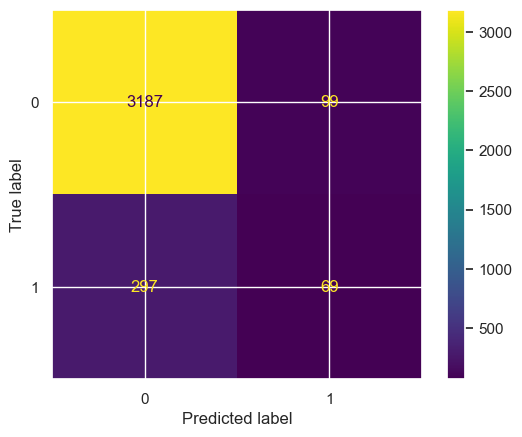

Accuracy: 0.891566265060241
Precision: 0.4107142857142857
Recall: 0.1885245901639344


In [34]:
# Step 2: Get predicted probabilities for the positive class (churn = 1)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (churn)

# Step 3: Apply a custom threshold (e.g., 0.3)
threshold = 0.3
y_pred_custom = np.where(y_probs > threshold, 1, 0)  # Predict churn if prob > threshold

# Step 4: Evaluate the performance
accuracy = metrics.accuracy_score(y_test, y_pred_custom)
precision = metrics.precision_score(y_test, y_pred_custom)
recall = metrics.recall_score(y_test, y_pred_custom)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_custom)
  
cm_display = metrics.ConfusionMatrixDisplay( 
    confusion_matrix=conf_matrix) 
  
cm_display.plot() 
plt.show() 

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

now the accuracy has been slightly decreased while recall has been improved.

#### Class weighting: 
In many classifiers (like Random Forest), you can set the class_weight parameter to 'balanced' to give higher weight to the minority class. This helps the model focus more on the minority class (churners).

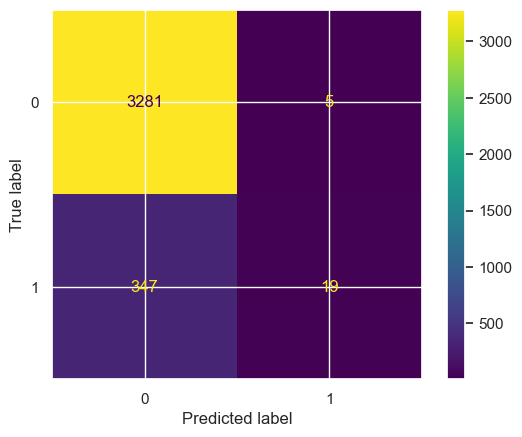

Accuracy: 0.9036144578313253
Precision: 0.7916666666666666
Recall: 0.05191256830601093


In [38]:
# Step 1: Modify RandomForestClassifier with class_weight='balanced'
rf_balanced = RandomForestClassifier(random_state=42, n_estimators = 1000,  class_weight='balanced')

# Step 2: Train the model
rf_balanced.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_balanced = rf_balanced.predict(X_test)

# Step 4: Evaluate the performance
accuracy = metrics.accuracy_score(y_test, y_pred_balanced)
precision = metrics.precision_score(y_test, y_pred_balanced)
recall = metrics.recall_score(y_test, y_pred_balanced)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_balanced)

cm_display = metrics.ConfusionMatrixDisplay( 
    confusion_matrix=conf_matrix) 
  
cm_display.plot() 
plt.show() 

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

class weighting slightly improves the recall with accuracy remains high

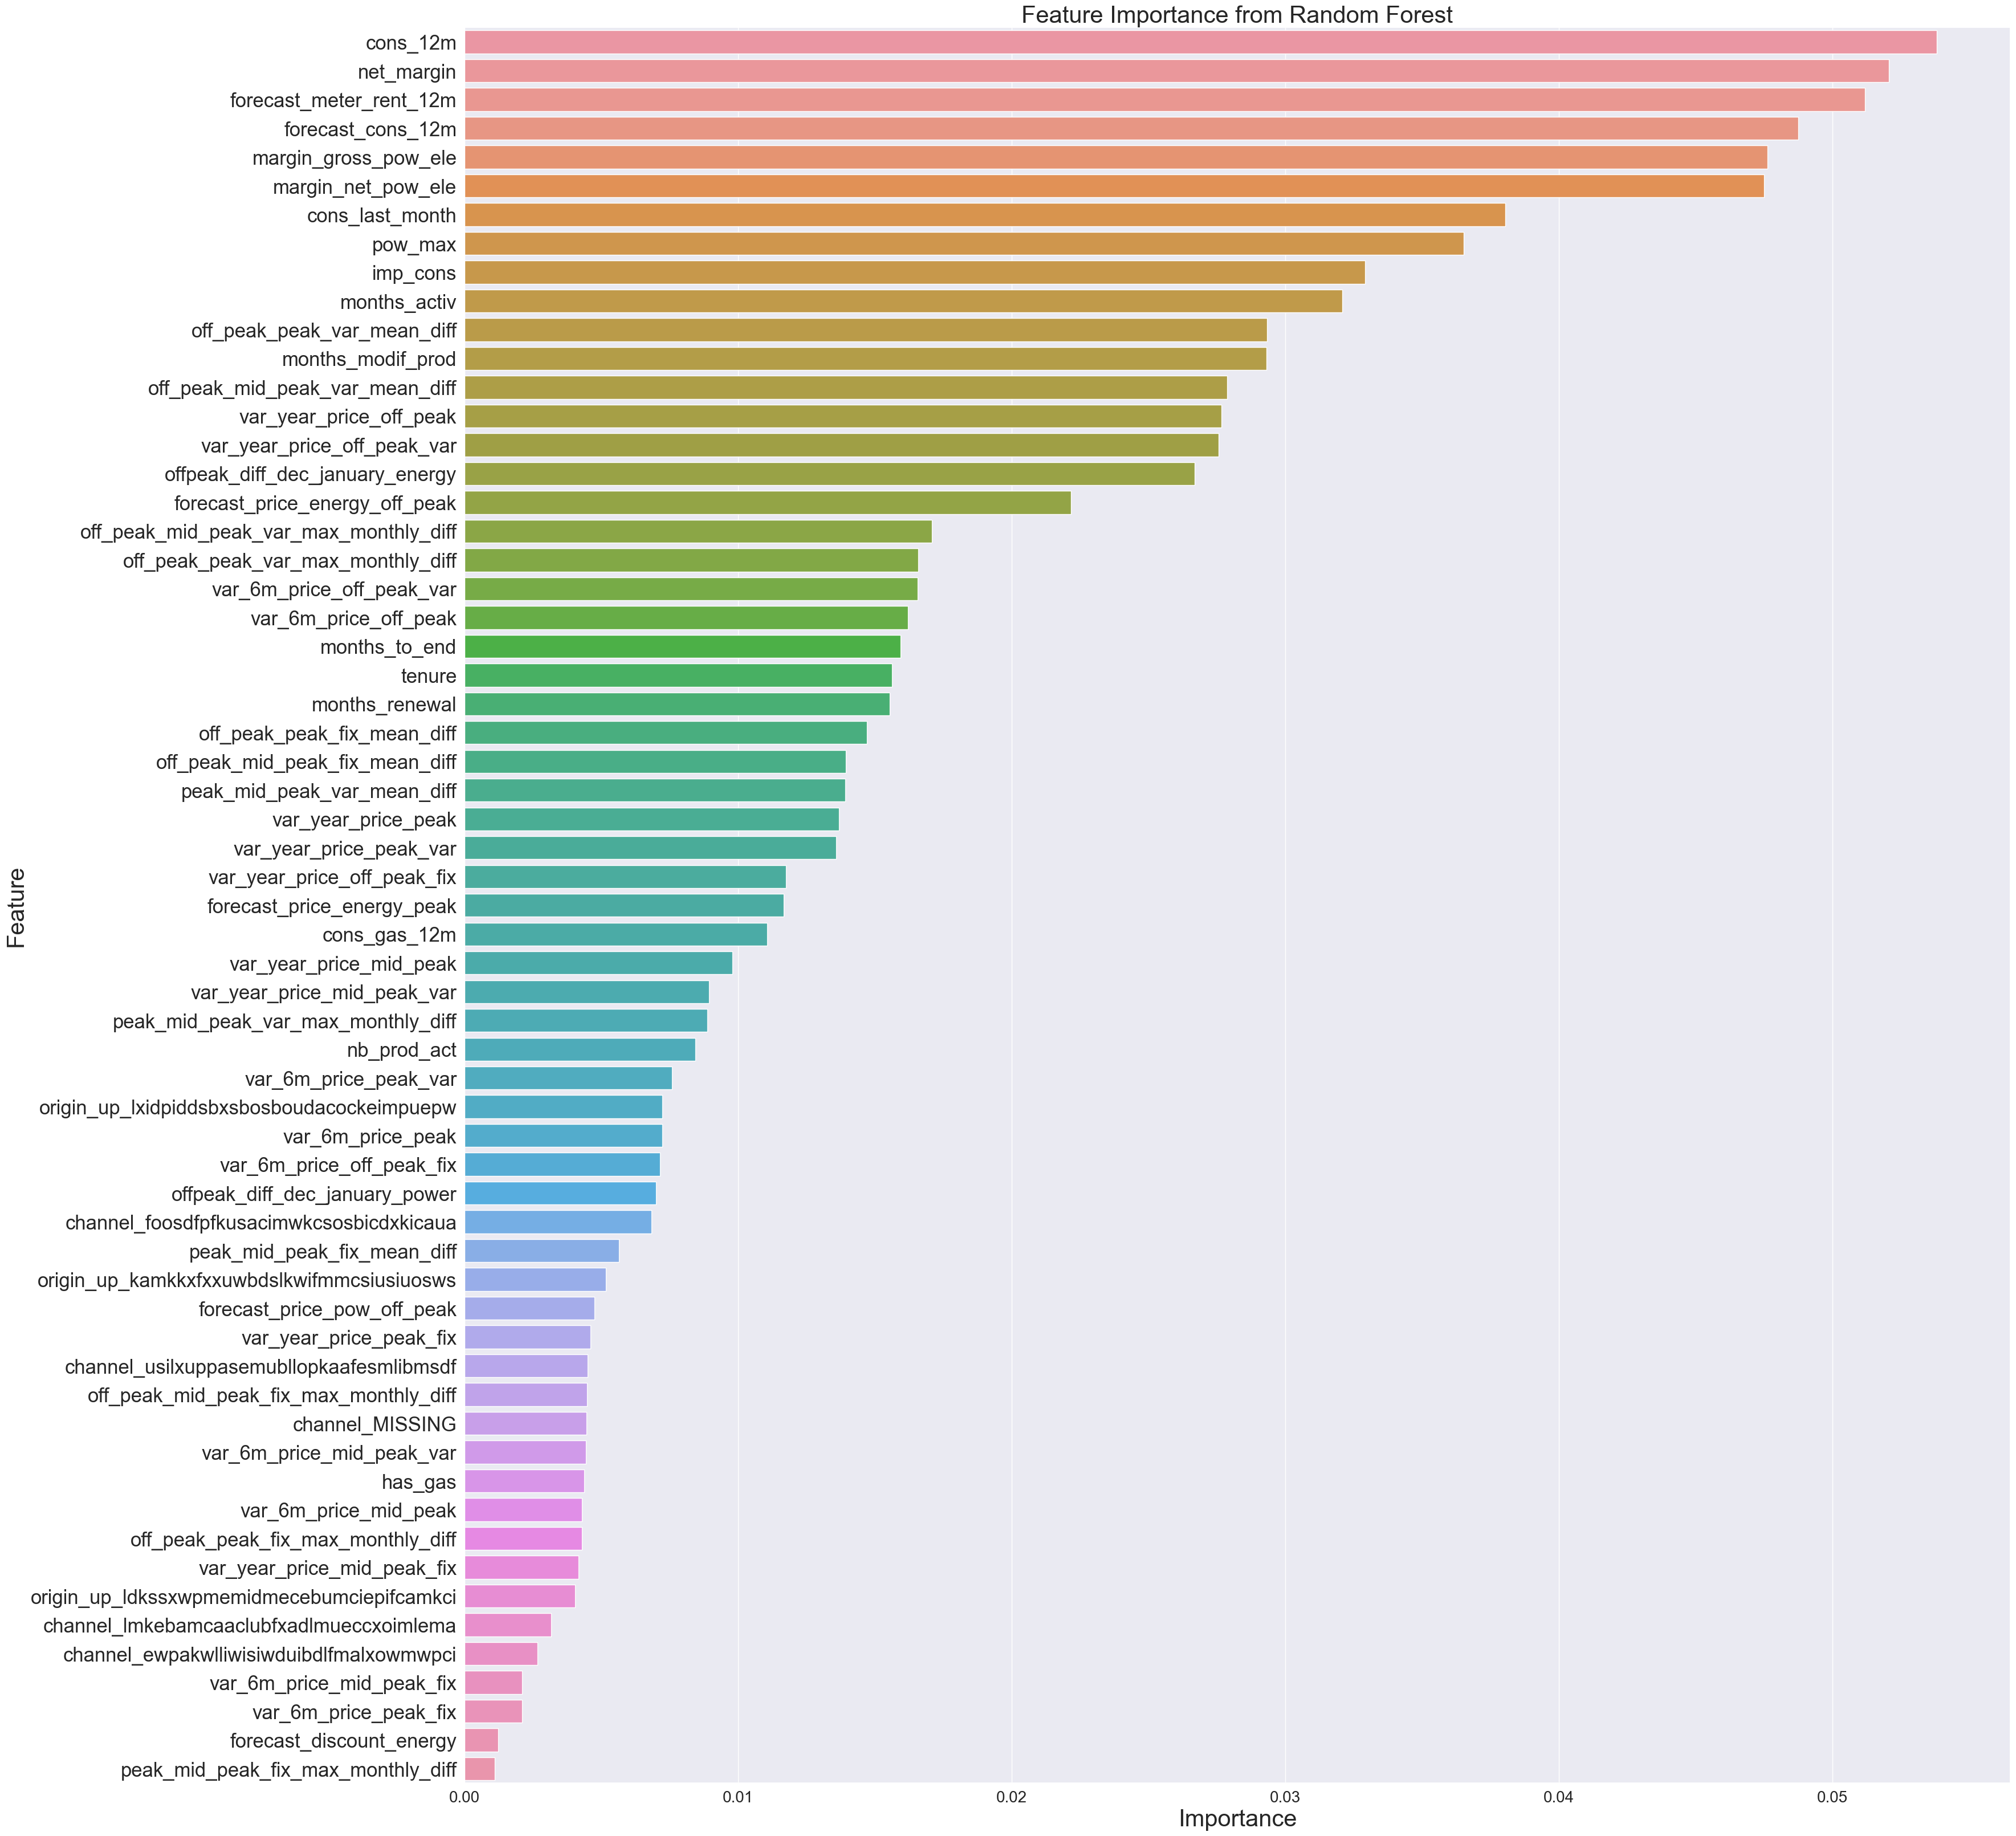

In [26]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(35, 40))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest', fontsize=30 )
plt.xlabel('Importance', fontsize=30)
plt.ylabel('Feature', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

- Net margin and consumption over the past 12 months are key drivers of churn in this model. Additionally, the margin on power subscriptions plays a significant role. Time-related factors, such as how long customers have been active, their tenure, and the number of months since their last contract update, also heavily influence churn. 

- The feature our colleague suggested ranks in the top half in terms of influence, with some derived features performing even better. While our price sensitivity features are present, they are not major contributors to churn. 

- This last point is crucial as it ties back to our original hypothesis: 

> Is customer churn driven by price sensitivity?

- According to the feature importance analysis, price sensitivity is a minor factor, though not entirely irrelevant. More experimentation is required to draw a firm conclusion.